# Monte Carlo Simulation

Used in Engineering, Physics and Finance.

Analyse a real problem, using Monte Carlo in Python

### Let's consider the following situation:
It's 9 AM in the office, when your boss comes to your desk and says that he wants two reports in his Desk by the end of the day.
But you have schedule a meeting with your friends at 6 PM! You want to keep your job, but you also don't want to miss the barbecue in just 9 hours;

What is the chance of you finishing the two reports in time for the party, and how can you compute that chance? We'll use Monte Carlo for that.

Each report may take up to:

A: 1 to 5 hours

B: 2 to 6 hours

In [1]:
import numpy as np

sims = 1000000

A = np.random.uniform(1, 5, sims)
B = np.random.uniform(2, 6, sims)

duration = A + B

print(duration)
print(duration.size)

[6.23974955 6.93027633 9.4163396  ... 8.98111886 5.94914124 7.07848769]
1000000


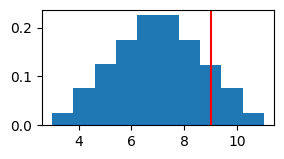

0.125081


In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 1.5))
plt.hist(duration, density=True)
plt.axvline(9, color='r')
plt.show()
print((duration > 9).sum()/sims)

## Russian Roulette with Monte Carlo

In this exercise, we'll use Monte Carlo simulation to analyze the probabilities involved in the game of Russian Roulette. Let's explore how randomness and probability play a crucial role in this high-stakes scenario!

In [7]:
import random

def russian_roulette(sims, chambers=6, bullets=1):
    
    results = {"survived": 0, "died": 0}
    
    for _ in range(sims):
        
        bullet_probability = bullets / chambers
        
        if random.random() < bullet_probability:
            results["died"] += 1
        else:
            results["survived"] += 1
    return results

def print_results(results, sims):
    survided = results["survived"]
    died = results["died"]
    
    print(f"Results after {sims} simulations:")
    print(f"Survived: {survided} ({survided/sims*100:.2f}%)")
    print(f"Died: {died} ({died/sims*100:.2f}%)")
    
if __name__ == "__main__":
    num_sims = 1000000
    
    results = russian_roulette(num_sims)
    print_results(results, num_sims)
    
    print()
        
    print("Different configurations of bullets in the revolver:")
    
    # Simulate with 2 bullets
    results_2 = russian_roulette(num_sims, chambers=6, bullets=2)
    print(f"2 bullets, 6 chambers: {results_2['died']/num_sims * 100:.2f}% death rate")

    # Simulate with 3 bullets
    results_3 = russian_roulette(num_sims, chambers=8, bullets=1)
    print(f"1 bullet, 8 chambers: {results_3['died']/num_sims * 100:.2f}% death rate")

Results after 1000000 simulations:
Survived: 833834 (83.38%)
Died: 166166 (16.62%)

Different configurations of bullets in the revolver:
2 bullets, 6 chambers: 33.35% death rate
1 bullet, 8 chambers: 12.55% death rate


Running Russian Roulette Monte Carlo Simulations...
Standard (1 bullet, 6 chambers): 16.65% death rate
2 bullets, 6 chambers: 33.31% death rate
1 bullet, 8 chambers: 12.53% death rate
2 bullets, 4 chambers: 49.98% death rate

Generating graphs...


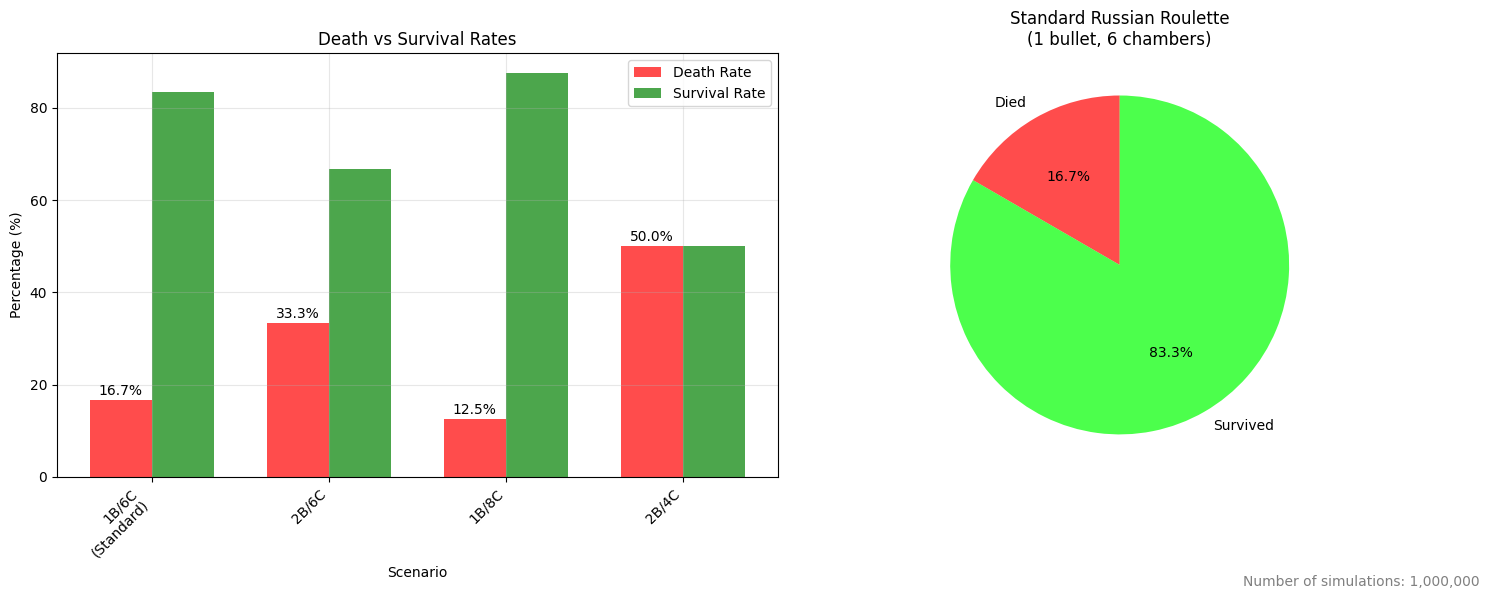

Creating convergence plot...


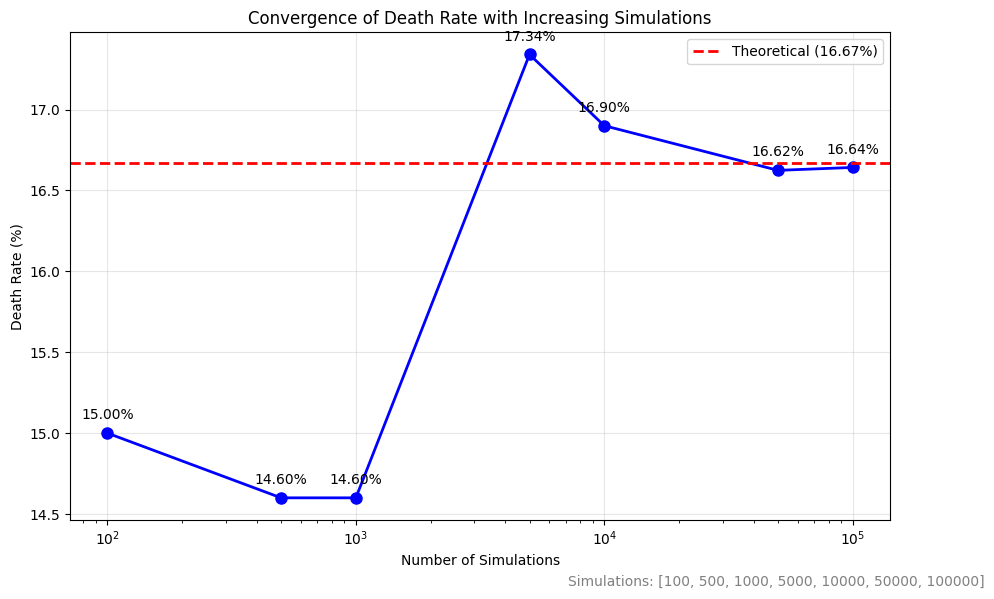

Creating probability heatmap...


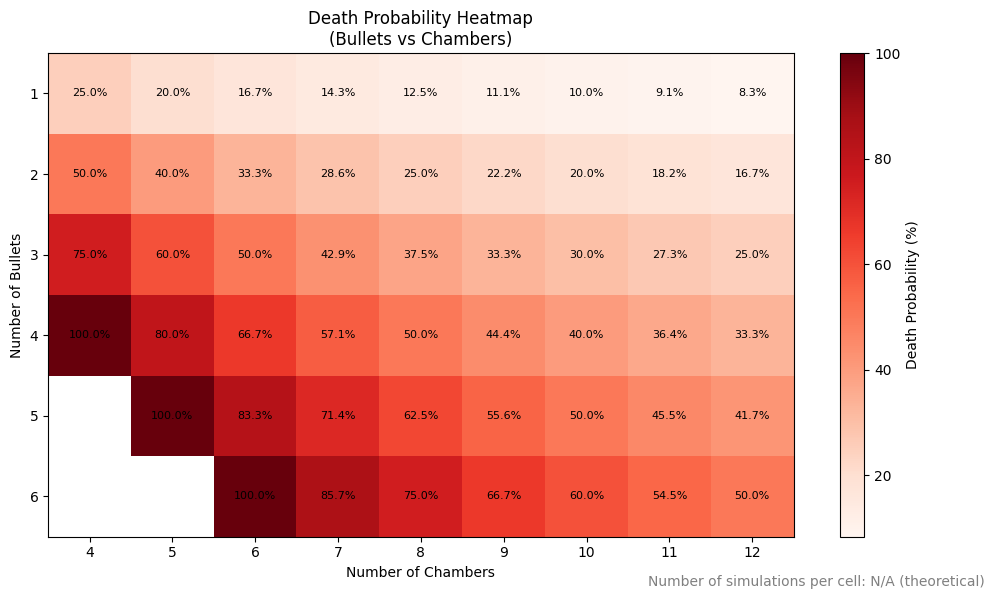

All graphs generated!


In [8]:
import random
import matplotlib.pyplot as plt
import numpy as np

def russian_roulette(sims, chambers=6, bullets=1):
    """
    Simple Monte Carlo simulation for Russian roulette.
    
    Args:
        sims: Number of simulations to run
        chambers: Number of chambers in the revolver (default 6)
        bullets: Number of bullets loaded (default 1)
    
    Returns:
        Dictionary with survival and death counts
    """
    results = {"survived": 0, "died": 0}
    
    for _ in range(sims):
        # Probability of getting a bullet on first pull
        bullet_probability = bullets / chambers
        
        if random.random() < bullet_probability:
            results["died"] += 1
        else:
            results["survived"] += 1
    
    return results

def plot_results(results_list, labels, title):
    """Create bar chart comparing different scenarios."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Death rates comparison
    death_rates = [r['died']/sum(r.values())*100 for r in results_list]
    survival_rates = [r['survived']/sum(r.values())*100 for r in results_list]
    
    x = np.arange(len(labels))
    width = 0.35
    
    bars1 = ax1.bar(x - width/2, death_rates, width, label='Death Rate', color='red', alpha=0.7)
    bars2 = ax1.bar(x + width/2, survival_rates, width, label='Survival Rate', color='green', alpha=0.7)
    
    ax1.set_xlabel('Scenario')
    ax1.set_ylabel('Percentage (%)')
    ax1.set_title('Death vs Survival Rates')
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels, rotation=45, ha='right')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Add percentage labels on bars
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.1f}%', ha='center', va='bottom')
    
    # Pie chart for standard scenario
    standard_result = results_list[0]  # Assuming first is standard 6-chamber, 1-bullet
    sizes = [standard_result['died'], standard_result['survived']]
    labels_pie = ['Died', 'Survived']
    colors = [(1, 0, 0, 0.7), (0, 1, 0, 0.7)]  # RGBA for red and green with alpha 0.7
    
    ax2.pie(sizes, labels=labels_pie, colors=colors, autopct='%1.1f%%', 
            startangle=90)
    ax2.set_title('Standard Russian Roulette\n(1 bullet, 6 chambers)')
    
    fig.text(0.99, 0.01, f'Number of simulations: {sum(results_list[0].values()):,}', 
             ha='right', va='bottom', fontsize=10, color='gray')
    plt.tight_layout()
    plt.show()

def convergence_plot(sims_list=[100, 500, 1000, 5000, 10000, 50000, 100000]):
    """Show how results converge as number of simulations increases."""
    death_rates = []
    
    for sims in sims_list:
        result = russian_roulette(sims)
        death_rate = result['died'] / sims * 100
        death_rates.append(death_rate)
    
    plt.figure(figsize=(10, 6))
    plt.plot(sims_list, death_rates, 'bo-', linewidth=2, markersize=8)
    plt.axhline(y=16.67, color='r', linestyle='--', linewidth=2, 
                label='Theoretical (16.67%)')
    plt.xlabel('Number of Simulations')
    plt.ylabel('Death Rate (%)')
    plt.title('Convergence of Death Rate with Increasing Simulations')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.xscale('log')
    
    # Add value labels
    for i, (x, y) in enumerate(zip(sims_list, death_rates)):
        plt.annotate(f'{y:.2f}%', (x, y), textcoords="offset points", 
                    xytext=(0,10), ha='center')
    
    plt.text(0.99, 0.01, f'Simulations: {sims_list}', 
             ha='right', va='bottom', fontsize=10, color='gray', transform=plt.gcf().transFigure)
    plt.tight_layout()
    plt.show()

def probability_heatmap():
    """Create heatmap showing death probability for different chamber/bullet combinations."""
    chambers_range = range(4, 13)  # 4 to 12 chambers
    bullets_range = range(1, 7)    # 1 to 6 bullets
    
    death_probs = np.zeros((len(bullets_range), len(chambers_range)))
    
    for i, bullets in enumerate(bullets_range):
        for j, chambers in enumerate(chambers_range):
            if bullets <= chambers:
                prob = bullets / chambers * 100
                death_probs[i, j] = prob
            else:
                death_probs[i, j] = np.nan  # Invalid combination
    
    plt.figure(figsize=(10, 6))
    im = plt.imshow(death_probs, cmap='Reds', aspect='auto')
    
    plt.colorbar(im, label='Death Probability (%)')
    plt.xlabel('Number of Chambers')
    plt.ylabel('Number of Bullets')
    plt.title('Death Probability Heatmap\n(Bullets vs Chambers)')
    
    # Set tick labels
    plt.xticks(range(len(chambers_range)), chambers_range)
    plt.yticks(range(len(bullets_range)), bullets_range)
    
    # Add text annotations
    for i in range(len(bullets_range)):
        for j in range(len(chambers_range)):
            if not np.isnan(death_probs[i, j]):
                plt.text(j, i, f'{death_probs[i, j]:.1f}%', 
                        ha='center', va='center', fontsize=8)
    
    plt.gcf().text(0.99, 0.01, f'Number of simulations per cell: N/A (theoretical)', 
                   ha='right', va='bottom', fontsize=10, color='gray')
    plt.tight_layout()
    plt.show()

# Run simulation and create visualizations
if __name__ == "__main__":
    num_sims = 1000000
    
    print("Running Russian Roulette Monte Carlo Simulations...")
    print("=" * 50)
    
    # Standard 6-chamber revolver with 1 bullet
    results_standard = russian_roulette(num_sims)
    print(f"Standard (1 bullet, 6 chambers): {results_standard['died']/num_sims*100:.2f}% death rate")
    
    # Different configurations
    results_2_bullets = russian_roulette(num_sims, chambers=6, bullets=2)
    results_8_chambers = russian_roulette(num_sims, chambers=8, bullets=1)
    results_dangerous = russian_roulette(num_sims, chambers=4, bullets=2)
    
    print(f"2 bullets, 6 chambers: {results_2_bullets['died']/num_sims*100:.2f}% death rate")
    print(f"1 bullet, 8 chambers: {results_8_chambers['died']/num_sims*100:.2f}% death rate")
    print(f"2 bullets, 4 chambers: {results_dangerous['died']/num_sims*100:.2f}% death rate")
    
    print("\nGenerating graphs...")
    
    # 1. Comparison bar chart and pie chart
    results_list = [results_standard, results_2_bullets, results_8_chambers, results_dangerous]
    labels = ['1B/6C\n(Standard)', '2B/6C', '1B/8C', '2B/4C']
    plot_results(results_list, labels, "Russian Roulette Scenarios")
    
    # 2. Convergence plot
    print("Creating convergence plot...")
    convergence_plot()
    
    # 3. Probability heatmap
    print("Creating probability heatmap...")
    probability_heatmap()
    
    print("All graphs generated!")